In [52]:
import numpy as np
import pandas as pd

filename = 'sd-data_cleanedv4.csv'
raw_data = pd.read_csv(filename)

data = raw_data.values # converting from pandas dataframe to numpy array
attribute_names = np.asarray(raw_data.columns) # extracting the attribute names
print("These are the features:",attribute_names) # prints the attribute names

These are the features: ['SMK1' '2' '3' ' urine_protein4' '5' '6' '7' '8' '9' ' hear_right10' '11'
 ' hear_left12' '13' '  sex' 'age' 'height' 'weight' 'waistline'
 'sight_left' 'sight_right' 'SBP' 'DBP' 'BLDS' 'tot_chole' 'HDL_chole'
 'LDL_chole' 'triglyceride' 'hemoglobin' 'serum_creatinine' 'SGOT_AST'
 'SGOT_ALT' 'gamma_GTP' 'DRK_YN']


In [53]:
# data in X,y format - y vector containing attribute 'DRK_YN' (drink yes/no)
X = np.delete(data, 32, axis=1)
y = data[:,32]

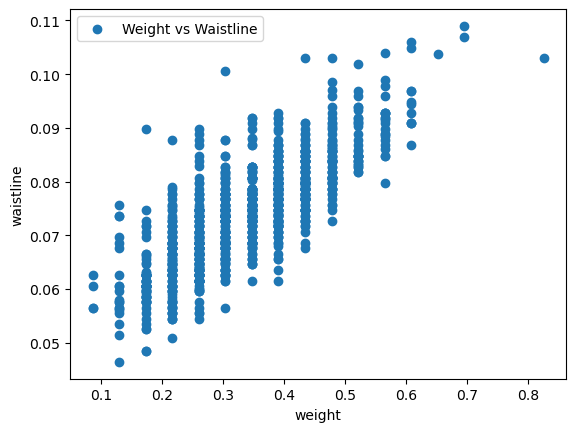

In [54]:
# in the following (for the first 1000 data points) the weight is plotted against the waistline.
# As one could somewhat expect there is a high correlation between these 2 attributes.
import matplotlib.pyplot as plt
A = data[0:1000,16]
B = data[0:1000,17]
plt.figure(1)
plt.scatter(A, B, label="Weight vs Waistline")
plt.xlabel(str(attribute_names[16]))
plt.ylabel(str(attribute_names[17]))
plt.legend()
plt.show()

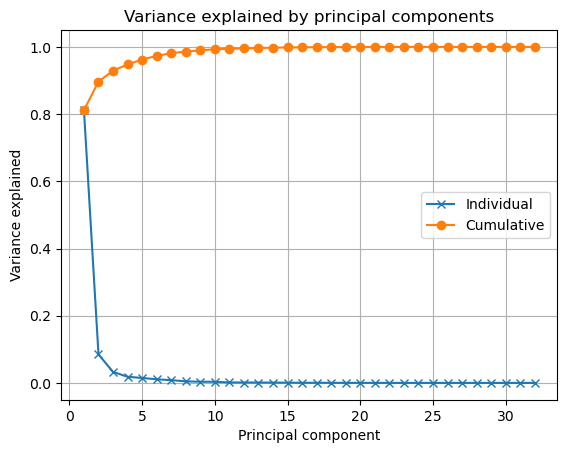

In [55]:
from scipy.linalg import svd

# PCA by computing SVD of Y
U,S,Vh = svd(X,full_matrices=False)
V = Vh.T    

rho = (S*S) / (S*S).sum() 

# plot of variance explained

plt.figure(2)
plt.plot(range(1,len(rho)+1),rho,'x-')
plt.plot(range(1,len(rho)+1),np.cumsum(rho),'o-')
plt.title('Variance explained by principal components');
plt.xlabel('Principal component');
plt.ylabel('Variance explained');
plt.legend(['Individual','Cumulative'])
plt.grid()
plt.show()

In [56]:
# How many pricipal comp for 95% explained
new_threshold = 0.95
sumit = 0
for i in range(len(rho)):
    sumit += rho[i]
    if sumit > new_threshold:
        print(str(i)+" principal comp for " +str(new_threshold)+ "% variance explained")
        break

4 principal comp for 0.95% variance explained


In [60]:
# Now we look at the first principal component to get a understanding about what features it captures
formatted_data = np.array([f'{x:.2f}' for x in V[:,0]])
print("These are the features:",attribute_names[:-1]), formatted_data

These are the features: ['SMK1' '2' '3' ' urine_protein4' '5' '6' '7' '8' '9' ' hear_right10' '11'
 ' hear_left12' '13' '  sex' 'age' 'height' 'weight' 'waistline'
 'sight_left' 'sight_right' 'SBP' 'DBP' 'BLDS' 'tot_chole' 'HDL_chole'
 'LDL_chole' 'triglyceride' 'hemoglobin' 'serum_creatinine' 'SGOT_AST'
 'SGOT_ALT' 'gamma_GTP']


(None,
 array(['-0.29', '-0.07', '-0.09', '-0.43', '-0.01', '-0.01', '-0.00',
        '-0.00', '-0.00', '-0.44', '-0.01', '-0.44', '-0.01', '-0.22',
        '-0.19', '-0.24', '-0.15', '-0.03', '-0.17', '-0.17', '-0.12',
        '-0.13', '-0.04', '-0.03', '-0.00', '-0.01', '-0.01', '-0.25',
        '-0.00', '-0.00', '-0.00', '-0.02'], dtype='<U5'))

To get a large (negative) projection onto v1, we need a person that meets the following : \
never smoked, normal hearing on both ears, urine_protein(-) and high concentration of hemolobin

In [63]:
# Getting the full projection of the data
Z = X @ V

In [64]:
formatted_data2 = np.array([f'{x:.2f}' for x in V[:,1]])
formatted_data2

array(['-0.59', '0.28', '0.39', '0.08', '0.00', '0.00', '0.00', '0.00',
       '0.00', '0.09', '-0.01', '0.09', '-0.01', '-0.57', '-0.00', '0.19',
       '0.11', '0.01', '0.07', '0.07', '0.04', '0.04', '0.01', '0.01',
       '-0.00', '0.00', '0.00', '0.10', '0.00', '0.00', '0.00', '0.02'],
      dtype='<U5')

v2: female nonsmoker for negative \
positive: used to/still smoke and is a high person and have high weight